In [52]:
# Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

In [53]:
# Load CIFAR-10 dataset

train_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    transform=transform,
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    transform=transform,
    download=True
)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [54]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        # TODO: Define the layers for the ANN (Flatten, Fully Connected, Activation functions)
        self.fc1 = nn.Linear(32*32*3, 512)  # Input layer (replace None with the number of units)
        self.fc2 = nn.Linear(512, 128)  # Hidden layer (replace None with the number of units)
        self.fc3 = nn.Linear(128, 10)  # Output layer for 10 classes

    def forward(self, x):
        # TODO: Define forward pass
        x = x.view(-1, 32*32*3)  # Flatten the input image
        x = nn.functional.relu(self.fc1(x))  # First fully connected layer + relu activation
        x = nn.functional.relu(self.fc2(x))  # Second fully connected layer + relu activation
        x = self.fc3(x)  # Output layer
        return x


In [55]:
# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.0003)

In [ ]:
# Training loop
num_epochs = 15
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # TODO: Move images and labels to the device
        images = images.to(device).reshape(images.size(0), -1)    # Replace None with the correct code
        labels = labels.to(device)  # Replace None with the correct code


        # TODO: Forward pass
        outputs = model_ann(images)  # Replace None with forward pass through the model
        loss = criterion(outputs, labels) # Replace None with the correct code to find error between labels and outputs
        ls_losses.append(loss.detach().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/15], Step [100/782], Loss: 1.6240
Epoch [1/15], Step [200/782], Loss: 1.7587
Epoch [1/15], Step [300/782], Loss: 1.7154
Epoch [1/15], Step [400/782], Loss: 1.6580
Epoch [1/15], Step [500/782], Loss: 1.2692
Epoch [1/15], Step [600/782], Loss: 1.5785
Epoch [1/15], Step [700/782], Loss: 1.5818
Epoch [2/15], Step [100/782], Loss: 1.5745
Epoch [2/15], Step [200/782], Loss: 1.5182
Epoch [2/15], Step [300/782], Loss: 1.4297
Epoch [2/15], Step [400/782], Loss: 1.3987
Epoch [2/15], Step [500/782], Loss: 1.4998
Epoch [2/15], Step [600/782], Loss: 1.4124
Epoch [2/15], Step [700/782], Loss: 1.6712
Epoch [3/15], Step [100/782], Loss: 1.1740
Epoch [3/15], Step [200/782], Loss: 1.4628
Epoch [3/15], Step [300/782], Loss: 1.4494
Epoch [3/15], Step [400/782], Loss: 1.3880
Epoch [3/15], Step [500/782], Loss: 1.2013
Epoch [3/15], Step [600/782], Loss: 1.2666
Epoch [3/15], Step [700/782], Loss: 1.3536
Epoch [4/15], Step [100/782], Loss: 1.3669
Epoch [4/15], Step [200/782], Loss: 0.9564
Epoch [4/15

ANN Accuracy: 0.5336
ANN Precision: 0.5383
ANN Recall: 0.5336
ANN F1-Score: 0.5339


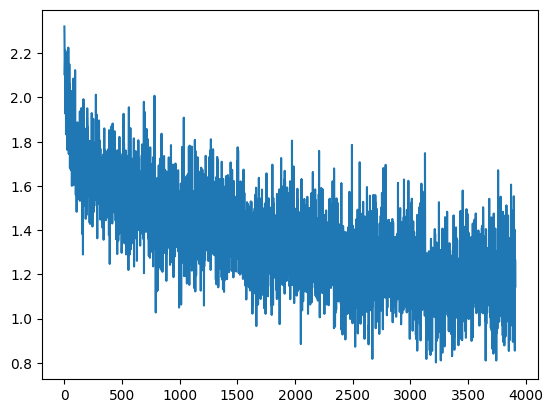

In [ ]:
# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

# Test the model
model_ann.eval()
all_preds_ann = []
all_labels_ann = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device).reshape(images.size(0), -1) # Replace None with code to move images to device and flatten
        labels = labels.to(device)

        outputs = model_ann(images)  # Replace None with the forward pass

        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())

accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='weighted')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='weighted')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='weighted')

print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")


# CNN


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # (3 → 32 feature maps)
        self.pool = nn.MaxPool2d(2, 2)  # Downsample by factor of 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # (32 → 64 feature maps)

        # After 2 maxpools: 32x32 → 16x16 → 8x8
        self.fc1 = nn.Linear(64 * 8 * 8, 256)  # Fully connected layer
        self.fc2 = nn.Linear(256, 10)  # Output layer for 10 classes

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Conv1 + ReLU + MaxPool
        x = self.pool(self.relu(self.conv2(x)))  # Conv2 + ReLU + MaxPool
        x = x.view(x.size(0), -1)  # Flatten: batch_size × (64*8*8)
        x = self.relu(self.fc1(x))  # FC1 + ReLU
        x = self.fc2(x)  # FC2 (logits, no softmax)
        return x

In [ ]:
# Initialize the CNN model, loss function, and optimizer
model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.0003)

# Training loop
num_epochs = 15
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)  # Replace None with the correct code
        labels = labels.to(device)  # Replace None with the correct code

        outputs = model_cnn(images)  # Replace None with forward pass through the model
        loss = criterion(outputs, labels) # Replace None with the correct code to find error between labels and outputs
        ls_losses.append(loss.detach().numpy())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
            

Epoch [1/5], Step [100/782], Loss: 1.3629
Epoch [1/5], Step [200/782], Loss: 1.3333
Epoch [1/5], Step [300/782], Loss: 1.3715
Epoch [1/5], Step [400/782], Loss: 1.1093
Epoch [1/5], Step [500/782], Loss: 1.0304
Epoch [1/5], Step [600/782], Loss: 1.1686
Epoch [1/5], Step [700/782], Loss: 0.9586
Epoch [2/5], Step [100/782], Loss: 0.7933
Epoch [2/5], Step [200/782], Loss: 0.8518
Epoch [2/5], Step [300/782], Loss: 0.9489
Epoch [2/5], Step [400/782], Loss: 1.0273
Epoch [2/5], Step [500/782], Loss: 1.0380
Epoch [2/5], Step [600/782], Loss: 1.0459
Epoch [2/5], Step [700/782], Loss: 0.7007
Epoch [3/5], Step [100/782], Loss: 0.6680
Epoch [3/5], Step [200/782], Loss: 0.6819
Epoch [3/5], Step [300/782], Loss: 0.8994
Epoch [3/5], Step [400/782], Loss: 0.8215
Epoch [3/5], Step [500/782], Loss: 0.7145
Epoch [3/5], Step [600/782], Loss: 0.8178
Epoch [3/5], Step [700/782], Loss: 0.4966
Epoch [4/5], Step [100/782], Loss: 0.5513
Epoch [4/5], Step [200/782], Loss: 0.6310
Epoch [4/5], Step [300/782], Loss:

In [ ]:
# Test the CNN model
model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []

with torch.no_grad():

    for images, labels in test_loader:
        images = images.to(device) # Replace None with code to move images to device and flatten
        labels = labels.to(device)

        outputs = model_cnn(images)   # Replace None with forward pass through the CNN
        _, predicted = torch.max(outputs.data, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='weighted')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='weighted')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='weighted')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")


CNN Accuracy: 0.7221
CNN Precision: 0.7229
CNN Recall: 0.7221
CNN F1-Score: 0.7209


In [ ]:
import pandas as pd

data = {
    'Model': ['ANN', 'CNN'],
    'Accuracy': [accuracy_ann, accuracy_cnn],
    'Precision': [precision_ann, precision_cnn],
    'Recall': [recall_ann, recall_cnn],
    'F1-Score': [f1_ann, f1_cnn]
}

df_comparison = pd.DataFrame(data)
print(df_comparison)

  Model  Accuracy  Precision  Recall  F1-Score
0   ANN    0.5336   0.538277  0.5336  0.533909
1   CNN    0.7221   0.722861  0.7221  0.720941


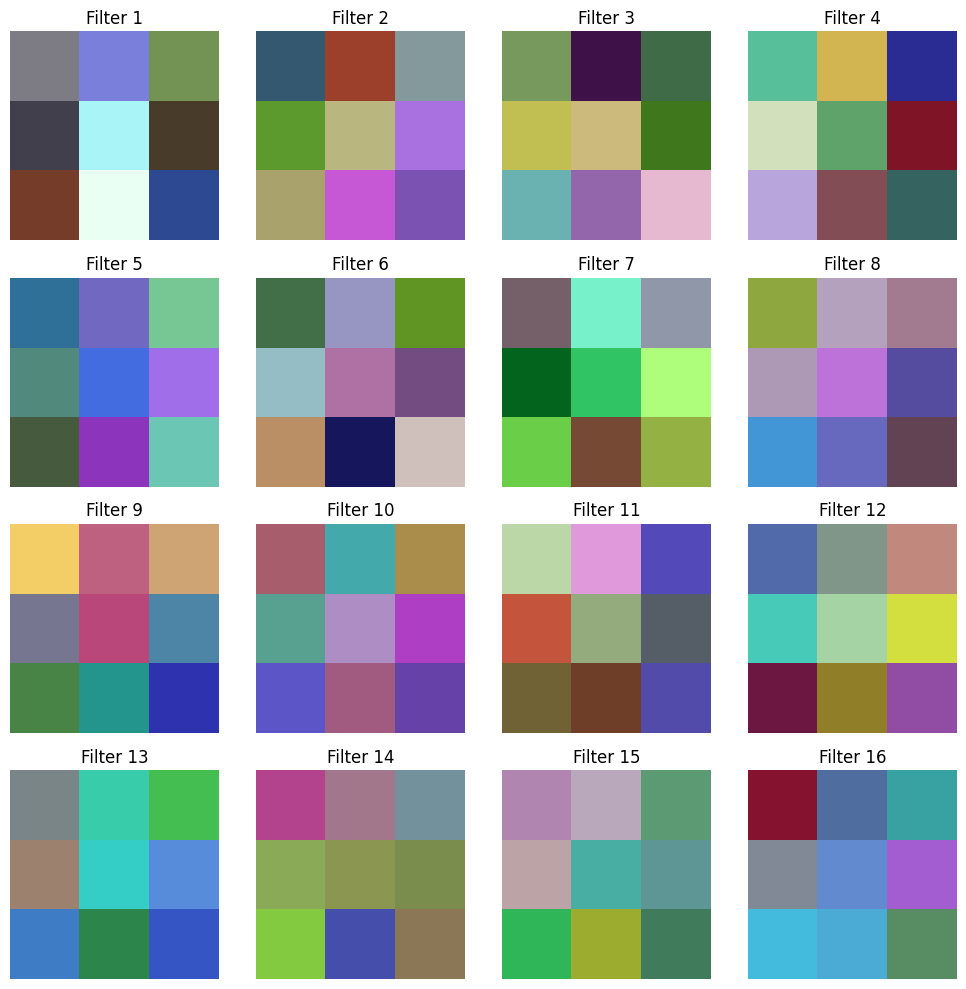

In [ ]:
# Visualize filters from the first convolutional layer of the CNN model

first_conv_layer_weights = model_cnn.conv1.weight.data.cpu().numpy()  # Replace None with code to extract layer weights (e.g., model_cnn.conv1.weight.data.cpu().numpy())

# TODO: Normalize the weights for visualization
# Normalizing helps bring all filter values to a common scale between 0 and 1
min_w = first_conv_layer_weights.min()  # Replace None with code to find the minimum value in the weights
max_w = first_conv_layer_weights.max()  # Replace None with code to find the maximum value in the weights
first_conv_layer_weights = (first_conv_layer_weights - min_w) / (max_w - min_w)  # Replace None with normalization formula

# TODO: Plot the filters
# We’ll display up to 16 filters for clarity
num_filters = first_conv_layer_weights.shape[0]  # Replace None with the total number of filters in the first layer
num_plots = min(num_filters, 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axes = axes.flatten()

for i in range(num_plots):
    # TODO: Select one filter to visualize
    filter_img = first_conv_layer_weights[i].transpose(1, 2, 0)  # Replace None with correct slice from first_conv_layer_weights
    axes[i].imshow(filter_img)
    axes[i].set_title(f'Filter {i+1}')
    axes[i].axis('off')

# Hide unused subplots
for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Define data augmentation transformations
train_transform_augmented = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset with data augmentation
train_dataset_augmented = torchvision.datasets.CIFAR10(root='./data', train=True,
                                                      download=True, transform=train_transform_augmented)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform) # Use the original transform for testing

train_loader_augmented = DataLoader(dataset=train_dataset_augmented, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# TODO: Initialize CNN model, loss function, and optimizer
model_cnn_augmented = CNN().to(device) # Replace None with model initialization (e.g., CNN().to(device))
criterion = nn.CrossEntropyLoss()  # Replace None with loss function (e.g., nn.CrossEntropyLoss())
optimizer_augmented = optim.Adam(model_cnn_augmented.parameters(), lr=0.0003)  # Replace None with optimizer (e.g., optim.Adam(...))

print("Training CNN with Data Augmentation...")

# TODO: Train the CNN model
num_epochs = 15
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_augmented):
        images = images.to(device)  # Replace None with the correct code
        labels = labels.to(device)  # Replace None with the correct code

        outputs = model_cnn_augmented(images)  # Replace None with forward pass through the model
        loss = criterion(outputs, labels) # Replace None with the correct code to find error between labels and outputs
        ls_losses.append(loss.detach().numpy())

        # Backward pass and optimization
        optimizer_augmented.zero_grad()
        loss.backward()
        optimizer_augmented.step()

        if (i + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader_augmented)}], Loss: {loss.item():.4f}")

Training CNN with Data Augmentation...
Epoch [1/5], Step [100/782], Loss: 1.5988
Epoch [1/5], Step [200/782], Loss: 1.2740
Epoch [1/5], Step [300/782], Loss: 1.3422
Epoch [1/5], Step [400/782], Loss: 1.2367
Epoch [1/5], Step [500/782], Loss: 1.1039
Epoch [1/5], Step [600/782], Loss: 1.1797
Epoch [1/5], Step [700/782], Loss: 0.8540
Epoch [2/5], Step [100/782], Loss: 0.9540
Epoch [2/5], Step [200/782], Loss: 0.9606
Epoch [2/5], Step [300/782], Loss: 0.9504
Epoch [2/5], Step [400/782], Loss: 0.9942
Epoch [2/5], Step [500/782], Loss: 0.9442
Epoch [2/5], Step [600/782], Loss: 0.7839
Epoch [2/5], Step [700/782], Loss: 1.1074
Epoch [3/5], Step [100/782], Loss: 0.8236
Epoch [3/5], Step [200/782], Loss: 0.6265
Epoch [3/5], Step [300/782], Loss: 0.8579
Epoch [3/5], Step [400/782], Loss: 0.7654
Epoch [3/5], Step [500/782], Loss: 0.7384
Epoch [3/5], Step [600/782], Loss: 0.6935
Epoch [3/5], Step [700/782], Loss: 0.6409
Epoch [4/5], Step [100/782], Loss: 0.6972
Epoch [4/5], Step [200/782], Loss: 0.

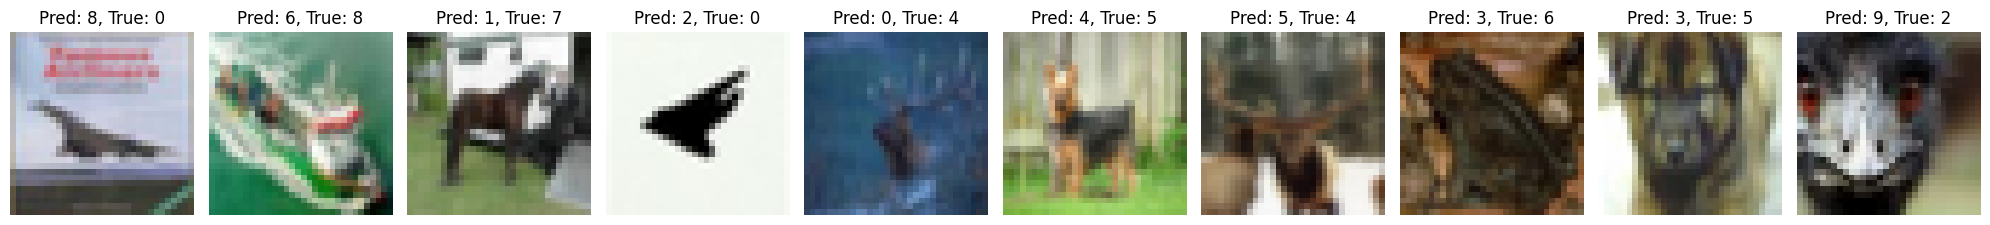

In [ ]:
# Visualize some incorrect predictions from the CNN model (using the augmented model if trained)
# TODO: Choose which model to evaluate (use augmented model if available)
model_to_evaluate = model_cnn_augmented if model_cnn_augmented is not None else model_cnn   # Replace None with conditional model selection
model_to_evaluate.eval()
model_to_evaluate.to(device)

incorrect_preds = []
incorrect_labels = []
incorrect_images = []

# TODO: Run the model on the test dataset
with torch.no_grad():
    for images, labels in test_loader:
        images_cpu = images.to('cpu')  # Replace None with a CPU copy of images for visualization
        images = images.to(device)  # Replace None with code to move images to device
        labels = labels.to(device)  # Replace None with code to move labels to device

        # Forward pass
        outputs = model_to_evaluate(images)  # Replace None with model forward pass
        _, predicted = torch.max(outputs, 1)  # Replace None with code to get class predictions using torch.max()

        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                incorrect_preds.append(predicted[i].item())
                incorrect_labels.append(labels[i].item())
                # Denormalize the image before storing
                img = images_cpu[i].numpy().transpose((1, 2, 0))
                img = 0.5 * img + 0.5 # Denormalize
                img = np.clip(img, 0, 1)
                incorrect_images.append(img)

# Display up to 10 incorrect predictions, add more visualisations if possible
num_to_display = min(len(incorrect_images), 10)
fig, axes = plt.subplots(nrows=1, ncols=num_to_display, figsize=(20, 4))

if num_to_display > 0:
    for i in range(num_to_display):
        axes[i].imshow(incorrect_images[i])
        axes[i].set_title(f'Pred: {incorrect_preds[i]}, True: {incorrect_labels[i]}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions to display.")